In [ ]:
%%time

import pandas as pd
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import sklearn.metrics
from sklearn.model_selection import cross_val_predict
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
import itertools

class_names = ["Hp","Sd","An","Fe","Ds","Sr","Nu"]

#All Features
#feature_cols = ["Step_Length","Step_Duration","Mean_AccX","Var_AccX","SD_AccX","Median_AccX","Min_AccX","Max_AccX","RMS_AccX","SMA_AccX","MINI_AccX","MAXI_AccX","POW_AccX","ENT_AccX","ENG_AccX","SKW_AccX","KUR_AccX","IQR_AccX","MAD_AccX","MAGNITUDE_F_AccX","BP_F_AccX","ENERGY_F_AccX","MEAN_F_AccX","MAX_F_AccX","WFL_AccX","ZCR_AccX","SSC_AccX","FFT_C2_AccX","FFT_C3_AccX","FFT_C4_AccX","FFT_C5_AccX","FFT_C6_AccX","FFT_C7_AccX","FFT_C8_AccX","FFT_C9_AccX","FFT_C10_AccX","FFT_C11_AccX","FFT_C12_AccX","FFT_C13_AccX","FFT_C14_AccX","FFT_C15_AccX","WL_SOS_DB_1_AccX","WL_SOS_DB_2_AccX","WL_SOS_DB_3_AccX","WL_SOS_DB_4_AccX","WL_SOS_DB_5_AccX","WL_ABS_DB_1_AccX","WL_ABS_DB_2_AccX","WL_ABS_DB_3_AccX","WL_ABS_DB_4_AccX","WL_ABS_DB_5_AccX","Mean_AccY","Var_AccY","SD_AccY","Median_AccY","Min_AccY","Max_AccY","RMS_AccY","SMA_AccY","MINI_AccY","MAXI_AccY","POW_AccY","ENT_AccY","ENG_AccY","SKW_AccY","KUR_AccY","IQR_AccY","MAD_AccY","MAGNITUDE_F_AccY","BP_F_AccY","ENERGY_F_AccY","MEAN_F_AccY","MAX_F_AccY","WFL_AccY","ZCR_AccY","SSC_AccY","FFT_C2_AccY","FFT_C3_AccY","FFT_C4_AccY","FFT_C5_AccY","FFT_C6_AccY","FFT_C7_AccY","FFT_C8_AccY","FFT_C9_AccY","FFT_C10_AccY","FFT_C11_AccY","FFT_C12_AccY","FFT_C13_AccY","FFT_C14_AccY","FFT_C15_AccY","WL_SOS_DB_1_AccY","WL_SOS_DB_2_AccY","WL_SOS_DB_3_AccY","WL_SOS_DB_4_AccY","WL_SOS_DB_5_AccY","WL_ABS_DB_1_AccY","WL_ABS_DB_2_AccY","WL_ABS_DB_3_AccY","WL_ABS_DB_4_AccY","WL_ABS_DB_5_AccY","Mean_AccZ","Var_AccZ","SD_AccZ","Median_AccZ","Min_AccZ","Max_AccZ","RMS_AccZ","SMA_AccZ","MINI_AccZ","MAXI_AccZ","POW_AccZ","ENT_AccZ","ENG_AccZ","SKW_AccZ","KUR_AccZ","IQR_AccZ","MAD_AccZ","MAGNITUDE_F_AccZ","BP_F_AccZ","ENERGY_F_AccZ","MEAN_F_AccZ","MAX_F_AccZ","WFL_AccZ","ZCR_AccZ","SSC_AccZ","FFT_C2_AccZ","FFT_C3_AccZ","FFT_C4_AccZ","FFT_C5_AccZ","FFT_C6_AccZ","FFT_C7_AccZ","FFT_C8_AccZ","FFT_C9_AccZ","FFT_C10_AccZ","FFT_C11_AccZ","FFT_C12_AccZ","FFT_C13_AccZ","FFT_C14_AccZ","FFT_C15_AccZ","WL_SOS_DB_1_AccZ","WL_SOS_DB_2_AccZ","WL_SOS_DB_3_AccZ","WL_SOS_DB_4_AccZ","WL_SOS_DB_5_AccZ","WL_ABS_DB_1_AccZ","WL_ABS_DB_2_AccZ","WL_ABS_DB_3_AccZ","WL_ABS_DB_4_AccZ","WL_ABS_DB_5_AccZ","Mean_GyX","Var_GyX","SD_GyX","Median_GyX","Min_GyX","Max_GyX","RMS_GyX","SMA_GyX","MINI_GyX","MAXI_GyX","POW_GyX","ENT_GyX","ENG_GyX","SKW_GyX","KUR_GyX","IQR_GyX","MAD_GyX","MAGNITUDE_F_GyX","BP_F_GyX","ENERGY_F_GyX","MEAN_F_GyX","MAX_F_GyX","WFL_GyX","ZCR_GyX","SSC_GyX","FFT_C2_GyX","FFT_C3_GyX","FFT_C4_GyX","FFT_C5_GyX","FFT_C6_GyX","FFT_C7_GyX","FFT_C8_GyX","FFT_C9_GyX","FFT_C10_GyX","FFT_C11_GyX","FFT_C12_GyX","FFT_C13_GyX","FFT_C14_GyX","FFT_C15_GyX","WL_SOS_DB_1_GyX","WL_SOS_DB_2_GyX","WL_SOS_DB_3_GyX","WL_SOS_DB_4_GyX","WL_SOS_DB_5_GyX","WL_ABS_DB_1_GyX","WL_ABS_DB_2_GyX","WL_ABS_DB_3_GyX","WL_ABS_DB_4_GyX","WL_ABS_DB_5_GyX","Mean_GyY","Var_GyY","SD_GyY","Median_GyY","Min_GyY","Max_GyY","RMS_GyY","SMA_GyY","MINI_GyY","MAXI_GyY","POW_GyY","ENT_GyY","ENG_GyY","SKW_GyY","KUR_GyY","IQR_GyY","MAD_GyY","MAGNITUDE_F_GyY","BP_F_GyY","ENERGY_F_GyY","MEAN_F_GyY","MAX_F_GyY","WFL_GyY","ZCR_GyY","SSC_GyY","FFT_C2_GyY","FFT_C3_GyY","FFT_C4_GyY","FFT_C5_GyY","FFT_C6_GyY","FFT_C7_GyY","FFT_C8_GyY","FFT_C9_GyY","FFT_C10_GyY","FFT_C11_GyY","FFT_C12_GyY","FFT_C13_GyY","FFT_C14_GyY","FFT_C15_GyY","WL_SOS_DB_1_GyY","WL_SOS_DB_2_GyY","WL_SOS_DB_3_GyY","WL_SOS_DB_4_GyY","WL_SOS_DB_5_GyY","WL_ABS_DB_1_GyY","WL_ABS_DB_2_GyY","WL_ABS_DB_3_GyY","WL_ABS_DB_4_GyY","WL_ABS_DB_5_GyY","Mean_GyZ","Var_GyZ","SD_GyZ","Median_GyZ","Min_GyZ","Max_GyZ","RMS_GyZ","SMA_GyZ","MINI_GyZ","MAXI_GyZ","POW_GyZ","ENT_GyZ","ENG_GyZ","SKW_GyZ","KUR_GyZ","IQR_GyZ","MAD_GyZ","MAGNITUDE_F_GyZ","BP_F_GyZ","ENERGY_F_GyZ","MEAN_F_GyZ","MAX_F_GyZ","WFL_GyZ","ZCR_GyZ","SSC_GyZ","FFT_C2_GyZ","FFT_C3_GyZ","FFT_C4_GyZ","FFT_C5_GyZ","FFT_C6_GyZ","FFT_C7_GyZ","FFT_C8_GyZ","FFT_C9_GyZ","FFT_C10_GyZ","FFT_C11_GyZ","FFT_C12_GyZ","FFT_C13_GyZ","FFT_C14_GyZ","FFT_C15_GyZ","WL_SOS_DB_1_GyZ","WL_SOS_DB_2_GyZ","WL_SOS_DB_3_GyZ","WL_SOS_DB_4_GyZ","WL_SOS_DB_5_GyZ","WL_ABS_DB_1_GyZ","WL_ABS_DB_2_GyZ","WL_ABS_DB_3_GyZ","WL_ABS_DB_4_GyZ","WL_ABS_DB_5_GyZ"]

#Accelerometer Features
#feature_cols = ["Step_Length","Step_Duration","Mean_AccX","Var_AccX","SD_AccX","Median_AccX","Min_AccX","Max_AccX","RMS_AccX","SMA_AccX","MINI_AccX","MAXI_AccX","POW_AccX","ENT_AccX","ENG_AccX","SKW_AccX","KUR_AccX","IQR_AccX","MAD_AccX","MAGNITUDE_F_AccX","BP_F_AccX","ENERGY_F_AccX","MEAN_F_AccX","MAX_F_AccX","WFL_AccX","ZCR_AccX","SSC_AccX","FFT_C1_AccX","FFT_C2_AccX","FFT_C3_AccX","FFT_C4_AccX","FFT_C5_AccX","FFT_C6_AccX","FFT_C7_AccX","FFT_C8_AccX","FFT_C9_AccX","FFT_C10_AccX","FFT_C11_AccX","FFT_C12_AccX","FFT_C13_AccX","FFT_C14_AccX","FFT_C15_AccX","WL_SOS_DB_1_AccX","WL_SOS_DB_2_AccX","WL_SOS_DB_3_AccX","WL_SOS_DB_4_AccX","WL_SOS_DB_5_AccX","WL_ABS_DB_1_AccX","WL_ABS_DB_2_AccX","WL_ABS_DB_3_AccX","WL_ABS_DB_4_AccX","WL_ABS_DB_5_AccX","Mean_AccY","Var_AccY","SD_AccY","Median_AccY","Min_AccY","Max_AccY","RMS_AccY","SMA_AccY","MINI_AccY","MAXI_AccY","POW_AccY","ENT_AccY","ENG_AccY","SKW_AccY","KUR_AccY","IQR_AccY","MAD_AccY","MAGNITUDE_F_AccY","BP_F_AccY","ENERGY_F_AccY","MEAN_F_AccY","MAX_F_AccY","WFL_AccY","ZCR_AccY","SSC_AccY","FFT_C1_AccY","FFT_C2_AccY","FFT_C3_AccY","FFT_C4_AccY","FFT_C5_AccY","FFT_C6_AccY","FFT_C7_AccY","FFT_C8_AccY","FFT_C9_AccY","FFT_C10_AccY","FFT_C11_AccY","FFT_C12_AccY","FFT_C13_AccY","FFT_C14_AccY","FFT_C15_AccY","WL_SOS_DB_1_AccY","WL_SOS_DB_2_AccY","WL_SOS_DB_3_AccY","WL_SOS_DB_4_AccY","WL_SOS_DB_5_AccY","WL_ABS_DB_1_AccY","WL_ABS_DB_2_AccY","WL_ABS_DB_3_AccY","WL_ABS_DB_4_AccY","WL_ABS_DB_5_AccY","Mean_AccZ","Var_AccZ","SD_AccZ","Median_AccZ","Min_AccZ","Max_AccZ","RMS_AccZ","SMA_AccZ","MINI_AccZ","MAXI_AccZ","POW_AccZ","ENT_AccZ","ENG_AccZ","SKW_AccZ","KUR_AccZ","IQR_AccZ","MAD_AccZ","MAGNITUDE_F_AccZ","BP_F_AccZ","ENERGY_F_AccZ","MEAN_F_AccZ","MAX_F_AccZ","WFL_AccZ","ZCR_AccZ","SSC_AccZ","FFT_C1_AccZ","FFT_C2_AccZ","FFT_C3_AccZ","FFT_C4_AccZ","FFT_C5_AccZ","FFT_C6_AccZ","FFT_C7_AccZ","FFT_C8_AccZ","FFT_C9_AccZ","FFT_C10_AccZ","FFT_C11_AccZ","FFT_C12_AccZ","FFT_C13_AccZ","FFT_C14_AccZ","FFT_C15_AccZ","WL_SOS_DB_1_AccZ","WL_SOS_DB_2_AccZ","WL_SOS_DB_3_AccZ","WL_SOS_DB_4_AccZ","WL_SOS_DB_5_AccZ","WL_ABS_DB_1_AccZ","WL_ABS_DB_2_AccZ","WL_ABS_DB_3_AccZ","WL_ABS_DB_4_AccZ","WL_ABS_DB_5_AccZ"]

#Time Features
#feature_cols = ["Step_Length","Step_Duration","Mean_AccX","Var_AccX","SD_AccX","Median_AccX","Min_AccX","Max_AccX","RMS_AccX","SMA_AccX","MINI_AccX","MAXI_AccX","POW_AccX","ENT_AccX","ENG_AccX","SKW_AccX","KUR_AccX","IQR_AccX","MAD_AccX","WFL_AccX","ZCR_AccX","SSC_AccX","Mean_AccY","Var_AccY","SD_AccY","Median_AccY","Min_AccY","Max_AccY","RMS_AccY","SMA_AccY","MINI_AccY","MAXI_AccY","POW_AccY","ENT_AccY","ENG_AccY","SKW_AccY","KUR_AccY","IQR_AccY","MAD_AccY","WFL_AccY","ZCR_AccY","SSC_AccY","Mean_AccZ","Var_AccZ","SD_AccZ","Median_AccZ","Min_AccZ","Max_AccZ","RMS_AccZ","SMA_AccZ","MINI_AccZ","MAXI_AccZ","POW_AccZ","ENT_AccZ","ENG_AccZ","SKW_AccZ","KUR_AccZ","IQR_AccZ","MAD_AccZ","WFL_AccZ","ZCR_AccZ","SSC_AccZ","Mean_GyX","Var_GyX","SD_GyX","Median_GyX","Min_GyX","Max_GyX","RMS_GyX","SMA_GyX","MINI_GyX","MAXI_GyX","POW_GyX","ENT_GyX","ENG_GyX","SKW_GyX","KUR_GyX","IQR_GyX","MAD_GyX","WFL_GyX","ZCR_GyX","SSC_GyX","Mean_GyY","Var_GyY","SD_GyY","Median_GyY","Min_GyY","Max_GyY","RMS_GyY","SMA_GyY","MINI_GyY","MAXI_GyY","POW_GyY","ENT_GyY","ENG_GyY","SKW_GyY","KUR_GyY","IQR_GyY","MAD_GyY","WFL_GyY","ZCR_GyY","SSC_GyY","Mean_GyZ","Var_GyZ","SD_GyZ","Median_GyZ","Min_GyZ","Max_GyZ","RMS_GyZ","SMA_GyZ","MINI_GyZ","MAXI_GyZ","POW_GyZ","ENT_GyZ","ENG_GyZ","SKW_GyZ","KUR_GyZ","IQR_GyZ","MAD_GyZ","WFL_GyZ","ZCR_GyZ","SSC_GyZ"]

#Frequency Domain Features
#feature_cols = ["MAGNITUDE_F_AccX","BP_F_AccX","ENERGY_F_AccX","MEAN_F_AccX","MAX_F_AccX","FFT_C1_AccX","FFT_C2_AccX","FFT_C3_AccX","FFT_C4_AccX","FFT_C5_AccX","FFT_C6_AccX","FFT_C7_AccX","FFT_C8_AccX","FFT_C9_AccX","FFT_C10_AccX","FFT_C11_AccX","FFT_C12_AccX","FFT_C13_AccX","FFT_C14_AccX","FFT_C15_AccX","MAGNITUDE_F_AccY","BP_F_AccY","ENERGY_F_AccY","MEAN_F_AccY","MAX_F_AccY","FFT_C1_AccY","FFT_C2_AccY","FFT_C3_AccY","FFT_C4_AccY","FFT_C5_AccY","FFT_C6_AccY","FFT_C7_AccY","FFT_C8_AccY","FFT_C9_AccY","FFT_C10_AccY","FFT_C11_AccY","FFT_C12_AccY","FFT_C13_AccY","FFT_C14_AccY","FFT_C15_AccY","MAGNITUDE_F_AccZ","BP_F_AccZ","ENERGY_F_AccZ","MEAN_F_AccZ","MAX_F_AccZ","FFT_C1_AccZ","FFT_C2_AccZ","FFT_C3_AccZ","FFT_C4_AccZ","FFT_C5_AccZ","FFT_C6_AccZ","FFT_C7_AccZ","FFT_C8_AccZ","FFT_C9_AccZ","FFT_C10_AccZ","FFT_C11_AccZ","FFT_C12_AccZ","FFT_C13_AccZ","FFT_C14_AccZ","FFT_C15_AccZ","MAGNITUDE_F_GyX","BP_F_GyX","ENERGY_F_GyX","MEAN_F_GyX","MAX_F_GyX","FFT_C1_GyX","FFT_C2_GyX","FFT_C3_GyX","FFT_C4_GyX","FFT_C5_GyX","FFT_C6_GyX","FFT_C7_GyX","FFT_C8_GyX","FFT_C9_GyX","FFT_C10_GyX","FFT_C11_GyX","FFT_C12_GyX","FFT_C13_GyX","FFT_C14_GyX","FFT_C15_GyX","MAGNITUDE_F_GyY","BP_F_GyY","ENERGY_F_GyY","MEAN_F_GyY","MAX_F_GyY","FFT_C1_GyY","FFT_C2_GyY","FFT_C3_GyY","FFT_C4_GyY","FFT_C5_GyY","FFT_C6_GyY","FFT_C7_GyY","FFT_C8_GyY","FFT_C9_GyY","FFT_C10_GyY","FFT_C11_GyY","FFT_C12_GyY","FFT_C13_GyY","FFT_C14_GyY","FFT_C15_GyY","MAGNITUDE_F_GyZ","BP_F_GyZ","ENERGY_F_GyZ","MEAN_F_GyZ","MAX_F_GyZ","FFT_C1_GyZ","FFT_C2_GyZ","FFT_C3_GyZ","FFT_C4_GyZ","FFT_C5_GyZ","FFT_C6_GyZ","FFT_C7_GyZ","FFT_C8_GyZ","FFT_C9_GyZ","FFT_C10_GyZ","FFT_C11_GyZ","FFT_C12_GyZ","FFT_C13_GyZ","FFT_C14_GyZ","FFT_C15_GyZ"]

#Wavelet Domain Features
#feature_cols = ["WL_SOS_DB_1_AccX","WL_SOS_DB_2_AccX","WL_SOS_DB_3_AccX","WL_SOS_DB_4_AccX","WL_SOS_DB_5_AccX","WL_ABS_DB_1_AccX","WL_ABS_DB_2_AccX","WL_ABS_DB_3_AccX","WL_ABS_DB_4_AccX","WL_ABS_DB_5_AccX","WL_SOS_DB_1_AccY","WL_SOS_DB_2_AccY","WL_SOS_DB_3_AccY","WL_SOS_DB_4_AccY","WL_SOS_DB_5_AccY","WL_ABS_DB_1_AccY","WL_ABS_DB_2_AccY","WL_ABS_DB_3_AccY","WL_ABS_DB_4_AccY","WL_ABS_DB_5_AccY","WL_SOS_DB_1_AccZ","WL_SOS_DB_2_AccZ","WL_SOS_DB_3_AccZ","WL_SOS_DB_4_AccZ","WL_SOS_DB_5_AccZ","WL_ABS_DB_1_AccZ","WL_ABS_DB_2_AccZ","WL_ABS_DB_3_AccZ","WL_ABS_DB_4_AccZ","WL_ABS_DB_5_AccZ","WL_SOS_DB_1_GyX","WL_SOS_DB_2_GyX","WL_SOS_DB_3_GyX","WL_SOS_DB_4_GyX","WL_SOS_DB_5_GyX","WL_ABS_DB_1_GyX","WL_ABS_DB_2_GyX","WL_ABS_DB_3_GyX","WL_ABS_DB_4_GyX","WL_ABS_DB_5_GyX","WL_SOS_DB_1_GyY","WL_SOS_DB_2_GyY","WL_SOS_DB_3_GyY","WL_SOS_DB_4_GyY","WL_SOS_DB_5_GyY","WL_ABS_DB_1_GyY","WL_ABS_DB_2_GyY","WL_ABS_DB_3_GyY","WL_ABS_DB_4_GyY","WL_ABS_DB_5_GyY","WL_SOS_DB_1_GyZ","WL_SOS_DB_2_GyZ","WL_SOS_DB_3_GyZ","WL_SOS_DB_4_GyZ","WL_SOS_DB_5_GyZ","WL_ABS_DB_1_GyZ","WL_ABS_DB_2_GyZ","WL_ABS_DB_3_GyZ","WL_ABS_DB_4_GyZ","WL_ABS_DB_5_GyZ"]

#top 250 features
#feature_cols =['SKW_AccY','Mean_AccX','IQR_AccY','Min_AccY','FFT_C4_AccY','Mean_AccZ','MAX_F_AccY','ENG_AccY','Median_AccX','Median_AccZ','MAGNITUDE_F_AccY','Var_AccY','MAD_AccY','ENT_AccY','POW_AccY','ENERGY_F_AccY','FFT_C5_AccY','BP_F_AccY','Mean_AccY','KUR_AccY','RMS_AccY','Median_AccY','MEAN_F_AccY','POW_AccZ','SD_AccY','RMS_AccZ','Max_AccZ','ENG_AccZ','FFT_C2_GyZ','ENT_AccZ','Min_AccZ','KUR_AccX','ENT_AccX','Step_Length','Step_Duration','Max_AccX','MEAN_F_AccX','SMA_AccX','SMA_AccY','SMA_AccZ','SMA_GyX','FFT_C3_AccX','RMS_AccX','WL_SOS_DB_1_AccY','SMA_GyY','WL_SOS_DB_3_AccX','FFT_C2_GyY','WL_SOS_DB_2_AccX','Max_AccY','FFT_C2_AccX','FFT_C5_AccZ','POW_AccX','WL_SOS_DB_2_AccY','MEAN_F_GyY','SMA_GyZ','BP_F_AccX','BP_F_GyY','ENG_AccX','WL_ABS_DB_1_AccY','SKW_AccZ','FFT_C3_GyY','MEAN_F_GyX','WL_ABS_DB_2_AccY','FFT_C9_AccY','IQR_AccX','ENERGY_F_GyY','WL_SOS_DB_5_AccY','BP_F_AccZ','SD_AccX','WL_SOS_DB_3_AccY','FFT_C7_AccZ','WL_SOS_DB_4_AccY','WL_SOS_DB_3_GyZ','ENERGY_F_AccZ','FFT_C4_AccZ','WL_SOS_DB_1_AccX','Var_AccZ','BP_F_GyX','Min_AccX','ENERGY_F_AccX','MAX_F_GyY','MAX_F_AccZ','MAD_GyY','MEAN_F_AccZ','Var_AccX','FFT_C11_AccY','ENERGY_F_GyX','WL_ABS_DB_3_AccY','MAGNITUDE_F_AccZ','FFT_C10_AccY','MAD_AccX','FFT_C3_AccY','IQR_GyZ','FFT_C8_AccY','FFT_C6_AccX','WL_SOS_DB_4_AccX','MAD_AccZ','WL_ABS_DB_1_GyX','WL_ABS_DB_2_AccX','MAGNITUDE_F_GyY','WL_SOS_DB_1_GyX','FFT_C7_AccY','WL_SOS_DB_3_GyX','SD_AccZ','MAD_GyZ','IQR_GyX','MAX_F_AccX','WL_SOS_DB_2_GyX','WL_ABS_DB_3_GyX','WL_ABS_DB_5_GyX','SD_GyY','Var_GyZ','WL_ABS_DB_5_AccY','FFT_C8_AccZ','SD_GyX','RMS_GyX','MAD_GyX','WL_ABS_DB_4_AccY','WL_SOS_DB_4_GyX','WL_ABS_DB_1_AccX','WL_SOS_DB_5_GyZ','ENG_GyX','WL_ABS_DB_2_GyY','ENG_GyZ','MEAN_F_GyZ','WL_SOS_DB_2_AccZ','WL_ABS_DB_2_GyZ','Var_GyX','WL_SOS_DB_5_GyX','SD_GyZ','Var_GyY','WL_ABS_DB_3_AccX','POW_GyY','FFT_C6_AccZ','RMS_GyZ','WL_ABS_DB_3_GyZ','IQR_AccZ','WL_ABS_DB_1_GyZ','POW_GyX','WL_ABS_DB_2_GyX','WL_ABS_DB_1_GyY','Min_GyZ','Max_GyY','ENG_GyY','WL_SOS_DB_4_GyZ','IQR_GyY','MAGNITUDE_F_AccX','WL_ABS_DB_4_GyX','POW_GyZ','FFT_C9_AccZ','RMS_GyY','ZCR_AccZ','MAX_F_GyX','FFT_C10_AccZ','WL_SOS_DB_2_GyZ','ENERGY_F_GyZ','WL_SOS_DB_1_GyZ','SKW_AccX','FFT_C14_AccY','FFT_C7_GyX','FFT_C5_AccX','Min_GyX','MAGNITUDE_F_GyX','FFT_C12_AccZ','Max_GyX','FFT_C4_GyX','WL_SOS_DB_5_AccX','FFT_C11_GyX','KUR_AccZ','BP_F_GyZ','FFT_C11_AccZ','WL_ABS_DB_3_GyY','FFT_C8_GyX','FFT_C9_GyX','WL_SOS_DB_1_AccZ','WL_ABS_DB_5_GyZ','WL_ABS_DB_4_GyZ','WL_SOS_DB_5_GyY','ZCR_AccX','WL_ABS_DB_5_AccZ','WL_ABS_DB_2_AccZ','Max_GyZ','FFT_C6_GyZ','KUR_GyZ','FFT_C8_AccX','WL_SOS_DB_5_AccZ','WL_SOS_DB_3_AccZ','WL_ABS_DB_5_GyY','WL_SOS_DB_3_GyY','WL_SOS_DB_4_GyY','FFT_C6_GyX','WL_ABS_DB_1_AccZ','SKW_GyX','Min_GyY','FFT_C13_AccY','FFT_C10_GyX','WL_ABS_DB_5_AccX','FFT_C9_GyY','WL_SOS_DB_2_GyY','FFT_C9_AccX','FFT_C14_AccZ','WL_ABS_DB_4_AccX','FFT_C7_AccX','FFT_C5_GyZ','KUR_GyY','MAX_F_GyZ','FFT_C6_GyY','FFT_C6_AccY','WL_ABS_DB_3_AccZ','WL_ABS_DB_4_GyY','FFT_C12_AccY','WL_SOS_DB_4_AccZ','FFT_C7_GyY','MAGNITUDE_F_GyZ','FFT_C3_GyZ','KUR_GyX','FFT_C14_GyX','FFT_C5_GyY','WL_ABS_DB_4_AccZ','SSC_AccZ','FFT_C13_AccZ','WL_SOS_DB_1_GyY','FFT_C3_AccZ','FFT_C15_AccY','FFT_C15_GyX','ZCR_GyZ','FFT_C8_GyY','FFT_C15_AccZ','ZCR_GyX','SKW_GyY','FFT_C7_GyZ','SKW_GyZ','FFT_C12_GyY','FFT_C9_GyZ','FFT_C12_GyX','FFT_C3_GyX','ZCR_GyY','FFT_C4_AccX','FFT_C13_GyX','FFT_C10_GyZ','FFT_C11_AccX','FFT_C8_GyZ','FFT_C10_AccX','FFT_C15_AccX','Median_GyX','FFT_C5_GyX','FFT_C13_GyZ','FFT_C2_GyX','FFT_C14_GyY','FFT_C14_AccX']

#top 200 features
feature_cols = ['SKW_AccY','Mean_AccX','IQR_AccY','Min_AccY','FFT_C4_AccY','Mean_AccZ','MAX_F_AccY','ENG_AccY','Median_AccX','Median_AccZ','MAGNITUDE_F_AccY','Var_AccY','MAD_AccY','ENT_AccY','POW_AccY','ENERGY_F_AccY','FFT_C5_AccY','BP_F_AccY','Mean_AccY','KUR_AccY','RMS_AccY','Median_AccY','MEAN_F_AccY','POW_AccZ','SD_AccY','RMS_AccZ','Max_AccZ','ENG_AccZ','FFT_C2_GyZ','ENT_AccZ','Min_AccZ','KUR_AccX','ENT_AccX','Step_Length','Step_Duration','Max_AccX','MEAN_F_AccX','SMA_AccX','SMA_AccY','SMA_AccZ','SMA_GyX','FFT_C3_AccX','RMS_AccX','WL_SOS_DB_1_AccY','SMA_GyY','WL_SOS_DB_3_AccX','FFT_C2_GyY','WL_SOS_DB_2_AccX','Max_AccY','FFT_C2_AccX','FFT_C5_AccZ','POW_AccX','WL_SOS_DB_2_AccY','MEAN_F_GyY','SMA_GyZ','BP_F_AccX','BP_F_GyY','ENG_AccX','WL_ABS_DB_1_AccY','SKW_AccZ','FFT_C3_GyY','MEAN_F_GyX','WL_ABS_DB_2_AccY','FFT_C9_AccY','IQR_AccX','ENERGY_F_GyY','WL_SOS_DB_5_AccY','BP_F_AccZ','SD_AccX','WL_SOS_DB_3_AccY','FFT_C7_AccZ','WL_SOS_DB_4_AccY','WL_SOS_DB_3_GyZ','ENERGY_F_AccZ','FFT_C4_AccZ','WL_SOS_DB_1_AccX','Var_AccZ','BP_F_GyX','Min_AccX','ENERGY_F_AccX','MAX_F_GyY','MAX_F_AccZ','MAD_GyY','MEAN_F_AccZ','Var_AccX','FFT_C11_AccY','ENERGY_F_GyX','WL_ABS_DB_3_AccY','MAGNITUDE_F_AccZ','FFT_C10_AccY','MAD_AccX','FFT_C3_AccY','IQR_GyZ','FFT_C8_AccY','FFT_C6_AccX','WL_SOS_DB_4_AccX','MAD_AccZ','WL_ABS_DB_1_GyX','WL_ABS_DB_2_AccX','MAGNITUDE_F_GyY','WL_SOS_DB_1_GyX','FFT_C7_AccY','WL_SOS_DB_3_GyX','SD_AccZ','MAD_GyZ','IQR_GyX','MAX_F_AccX','WL_SOS_DB_2_GyX','WL_ABS_DB_3_GyX','WL_ABS_DB_5_GyX','SD_GyY','Var_GyZ','WL_ABS_DB_5_AccY','FFT_C8_AccZ','SD_GyX','RMS_GyX','MAD_GyX','WL_ABS_DB_4_AccY','WL_SOS_DB_4_GyX','WL_ABS_DB_1_AccX','WL_SOS_DB_5_GyZ','ENG_GyX','WL_ABS_DB_2_GyY','ENG_GyZ','MEAN_F_GyZ','WL_SOS_DB_2_AccZ','WL_ABS_DB_2_GyZ','Var_GyX','WL_SOS_DB_5_GyX','SD_GyZ','Var_GyY','WL_ABS_DB_3_AccX','POW_GyY','FFT_C6_AccZ','RMS_GyZ','WL_ABS_DB_3_GyZ','IQR_AccZ','WL_ABS_DB_1_GyZ','POW_GyX','WL_ABS_DB_2_GyX','WL_ABS_DB_1_GyY','Min_GyZ','Max_GyY','ENG_GyY','WL_SOS_DB_4_GyZ','IQR_GyY','MAGNITUDE_F_AccX','WL_ABS_DB_4_GyX','POW_GyZ','FFT_C9_AccZ','RMS_GyY','ZCR_AccZ','MAX_F_GyX','FFT_C10_AccZ','WL_SOS_DB_2_GyZ','ENERGY_F_GyZ','WL_SOS_DB_1_GyZ','SKW_AccX','FFT_C14_AccY','FFT_C7_GyX','FFT_C5_AccX','Min_GyX','MAGNITUDE_F_GyX','FFT_C12_AccZ','Max_GyX','FFT_C4_GyX','WL_SOS_DB_5_AccX','FFT_C11_GyX','KUR_AccZ','BP_F_GyZ','FFT_C11_AccZ','WL_ABS_DB_3_GyY','FFT_C8_GyX','FFT_C9_GyX','WL_SOS_DB_1_AccZ','WL_ABS_DB_5_GyZ','WL_ABS_DB_4_GyZ','WL_SOS_DB_5_GyY','ZCR_AccX','WL_ABS_DB_5_AccZ','WL_ABS_DB_2_AccZ','Max_GyZ','FFT_C6_GyZ','KUR_GyZ','FFT_C8_AccX','WL_SOS_DB_5_AccZ','WL_SOS_DB_3_AccZ','WL_ABS_DB_5_GyY','WL_SOS_DB_3_GyY','WL_SOS_DB_4_GyY','FFT_C6_GyX','WL_ABS_DB_1_AccZ','SKW_GyX','Min_GyY','FFT_C13_AccY','FFT_C10_GyX','WL_ABS_DB_5_AccX','FFT_C9_GyY','WL_SOS_DB_2_GyY','FFT_C9_AccX']

#top 150 features
#feature_cols = ['SKW_AccY','Mean_AccX','IQR_AccY','Min_AccY','FFT_C4_AccY','Mean_AccZ','MAX_F_AccY','ENG_AccY','Median_AccX','Median_AccZ','MAGNITUDE_F_AccY','Var_AccY','MAD_AccY','ENT_AccY','POW_AccY','ENERGY_F_AccY','FFT_C5_AccY','BP_F_AccY','Mean_AccY','KUR_AccY','RMS_AccY','Median_AccY','MEAN_F_AccY','POW_AccZ','SD_AccY','RMS_AccZ','Max_AccZ','ENG_AccZ','FFT_C2_GyZ','ENT_AccZ','Min_AccZ','KUR_AccX','ENT_AccX','Step_Length','Step_Duration','Max_AccX','MEAN_F_AccX','SMA_AccX','SMA_AccY','SMA_AccZ','SMA_GyX','FFT_C3_AccX','RMS_AccX','WL_SOS_DB_1_AccY','SMA_GyY','WL_SOS_DB_3_AccX','FFT_C2_GyY','WL_SOS_DB_2_AccX','Max_AccY','FFT_C2_AccX','FFT_C5_AccZ','POW_AccX','WL_SOS_DB_2_AccY','MEAN_F_GyY','SMA_GyZ','BP_F_AccX','BP_F_GyY','ENG_AccX','WL_ABS_DB_1_AccY','SKW_AccZ','FFT_C3_GyY','MEAN_F_GyX','WL_ABS_DB_2_AccY','FFT_C9_AccY','IQR_AccX','ENERGY_F_GyY','WL_SOS_DB_5_AccY','BP_F_AccZ','SD_AccX','WL_SOS_DB_3_AccY','FFT_C7_AccZ','WL_SOS_DB_4_AccY','WL_SOS_DB_3_GyZ','ENERGY_F_AccZ','FFT_C4_AccZ','WL_SOS_DB_1_AccX','Var_AccZ','BP_F_GyX','Min_AccX','ENERGY_F_AccX','MAX_F_GyY','MAX_F_AccZ','MAD_GyY','MEAN_F_AccZ','Var_AccX','FFT_C11_AccY','ENERGY_F_GyX','WL_ABS_DB_3_AccY','MAGNITUDE_F_AccZ','FFT_C10_AccY','MAD_AccX','FFT_C3_AccY','IQR_GyZ','FFT_C8_AccY','FFT_C6_AccX','WL_SOS_DB_4_AccX','MAD_AccZ','WL_ABS_DB_1_GyX','WL_ABS_DB_2_AccX','MAGNITUDE_F_GyY','WL_SOS_DB_1_GyX','FFT_C7_AccY','WL_SOS_DB_3_GyX','SD_AccZ','MAD_GyZ','IQR_GyX','MAX_F_AccX','WL_SOS_DB_2_GyX','WL_ABS_DB_3_GyX','WL_ABS_DB_5_GyX','SD_GyY','Var_GyZ','WL_ABS_DB_5_AccY','FFT_C8_AccZ','SD_GyX','RMS_GyX','MAD_GyX','WL_ABS_DB_4_AccY','WL_SOS_DB_4_GyX','WL_ABS_DB_1_AccX','WL_SOS_DB_5_GyZ','ENG_GyX','WL_ABS_DB_2_GyY','ENG_GyZ','MEAN_F_GyZ','WL_SOS_DB_2_AccZ','WL_ABS_DB_2_GyZ','Var_GyX','WL_SOS_DB_5_GyX','SD_GyZ','Var_GyY','WL_ABS_DB_3_AccX','POW_GyY','FFT_C6_AccZ','RMS_GyZ','WL_ABS_DB_3_GyZ','IQR_AccZ','WL_ABS_DB_1_GyZ','POW_GyX','WL_ABS_DB_2_GyX','WL_ABS_DB_1_GyY','Min_GyZ','Max_GyY','ENG_GyY','WL_SOS_DB_4_GyZ','IQR_GyY','MAGNITUDE_F_AccX','WL_ABS_DB_4_GyX','POW_GyZ','FFT_C9_AccZ']

#top 100 features
#feature_cols = ['SKW_AccY', 'Mean_AccX', 'IQR_AccY', 'Min_AccY', 'FFT_C4_AccY', 'Mean_AccZ', 'MAX_F_AccY', 'ENG_AccY', 'Median_AccX', 'Median_AccZ', 'MAGNITUDE_F_AccY', 'Var_AccY', 'MAD_AccY', 'ENT_AccY', 'POW_AccY', 'ENERGY_F_AccY', 'FFT_C5_AccY', 'BP_F_AccY', 'Mean_AccY', 'KUR_AccY', 'RMS_AccY', 'Median_AccY', 'MEAN_F_AccY', 'POW_AccZ', 'SD_AccY', 'RMS_AccZ', 'Max_AccZ', 'ENG_AccZ', 'FFT_C2_GyZ', 'ENT_AccZ', 'Min_AccZ', 'KUR_AccX', 'ENT_AccX', 'Step_Length', 'Step_Duration', 'Max_AccX', 'MEAN_F_AccX', 'SMA_AccX', 'SMA_AccY', 'SMA_AccZ', 'SMA_GyX', 'FFT_C3_AccX', 'RMS_AccX', 'WL_SOS_DB_1_AccY', 'SMA_GyY', 'WL_SOS_DB_3_AccX', 'FFT_C2_GyY', 'WL_SOS_DB_2_AccX', 'Max_AccY', 'FFT_C2_AccX', 'FFT_C5_AccZ', 'POW_AccX', 'WL_SOS_DB_2_AccY', 'MEAN_F_GyY', 'SMA_GyZ', 'BP_F_AccX', 'BP_F_GyY', 'ENG_AccX', 'WL_ABS_DB_1_AccY', 'SKW_AccZ', 'FFT_C3_GyY', 'MEAN_F_GyX', 'WL_ABS_DB_2_AccY', 'FFT_C9_AccY', 'IQR_AccX', 'ENERGY_F_GyY', 'WL_SOS_DB_5_AccY', 'BP_F_AccZ', 'SD_AccX', 'WL_SOS_DB_3_AccY', 'FFT_C7_AccZ', 'WL_SOS_DB_4_AccY', 'WL_SOS_DB_3_GyZ', 'ENERGY_F_AccZ', 'FFT_C4_AccZ', 'WL_SOS_DB_1_AccX', 'Var_AccZ', 'BP_F_GyX', 'Min_AccX', 'ENERGY_F_AccX', 'MAX_F_GyY', 'MAX_F_AccZ', 'MAD_GyY', 'MEAN_F_AccZ', 'Var_AccX', 'FFT_C11_AccY', 'ENERGY_F_GyX', 'WL_ABS_DB_3_AccY', 'MAGNITUDE_F_AccZ', 'FFT_C10_AccY', 'MAD_AccX', 'FFT_C3_AccY', 'IQR_GyZ', 'FFT_C8_AccY', 'FFT_C6_AccX', 'WL_SOS_DB_4_AccX', 'MAD_AccZ', 'WL_ABS_DB_1_GyX', 'WL_ABS_DB_2_AccX', 'MAGNITUDE_F_GyY']

#top 50 features
#feature_cols = ['SKW_AccY','Mean_AccX','IQR_AccY','Min_AccY','FFT_C4_AccY','Mean_AccZ','MAX_F_AccY','ENG_AccY','Median_AccX','Median_AccZ','MAGNITUDE_F_AccY','Var_AccY','MAD_AccY','ENT_AccY','POW_AccY','ENERGY_F_AccY','FFT_C5_AccY','BP_F_AccY','Mean_AccY','KUR_AccY','RMS_AccY','Median_AccY','MEAN_F_AccY','POW_AccZ','SD_AccY','RMS_AccZ','Max_AccZ','ENG_AccZ','FFT_C2_GyZ','ENT_AccZ','Min_AccZ','KUR_AccX','ENT_AccX','Step_Length','Step_Duration','Max_AccX','MEAN_F_AccX','SMA_AccX','SMA_AccY','SMA_AccZ','SMA_GyX','FFT_C3_AccX','RMS_AccX','WL_SOS_DB_1_AccY','SMA_GyY','WL_SOS_DB_3_AccX','FFT_C2_GyY','WL_SOS_DB_2_AccX','Max_AccY','FFT_C2_AccX']

data = pd.read_csv("Features.csv")
XX = data[feature_cols]
y = data.Label

scaler = StandardScaler()
scaler.fit(XX)
X = scaler.transform(XX)

print("Total Samples: " +  str(X.shape))

cc_cf = class_names    
classifier = SVC(kernel='rbf', C=5, gamma=0.03)
crossvalidation = cross_validation.KFold(n=X.shape[0], n_folds=10, shuffle=True)
prediction = cross_val_predict(classifier, X, y, cv=crossvalidation, n_jobs=2)
conf_mat = sklearn.metrics.confusion_matrix(y,prediction)

np.set_printoptions(precision=2)      
accuray = round(sklearn.metrics.accuracy_score(y, prediction)*100,2)
print("Accuracy: " + str(accuray))

y_true = pd.Series(cc_cf, name="Actual")
y_pred = pd.Series(cc_cf, name="Predicted")
df_confusion = pd.crosstab(y_true, y_pred)
for i in range(0,7):
    for j in range(0,7):
        df_confusion.iat[i,j] = conf_mat[i][j]
print (df_confusion)
df_confusion.to_csv("SVM_Results//6_Class//All_"+str(accuray)+".csv")

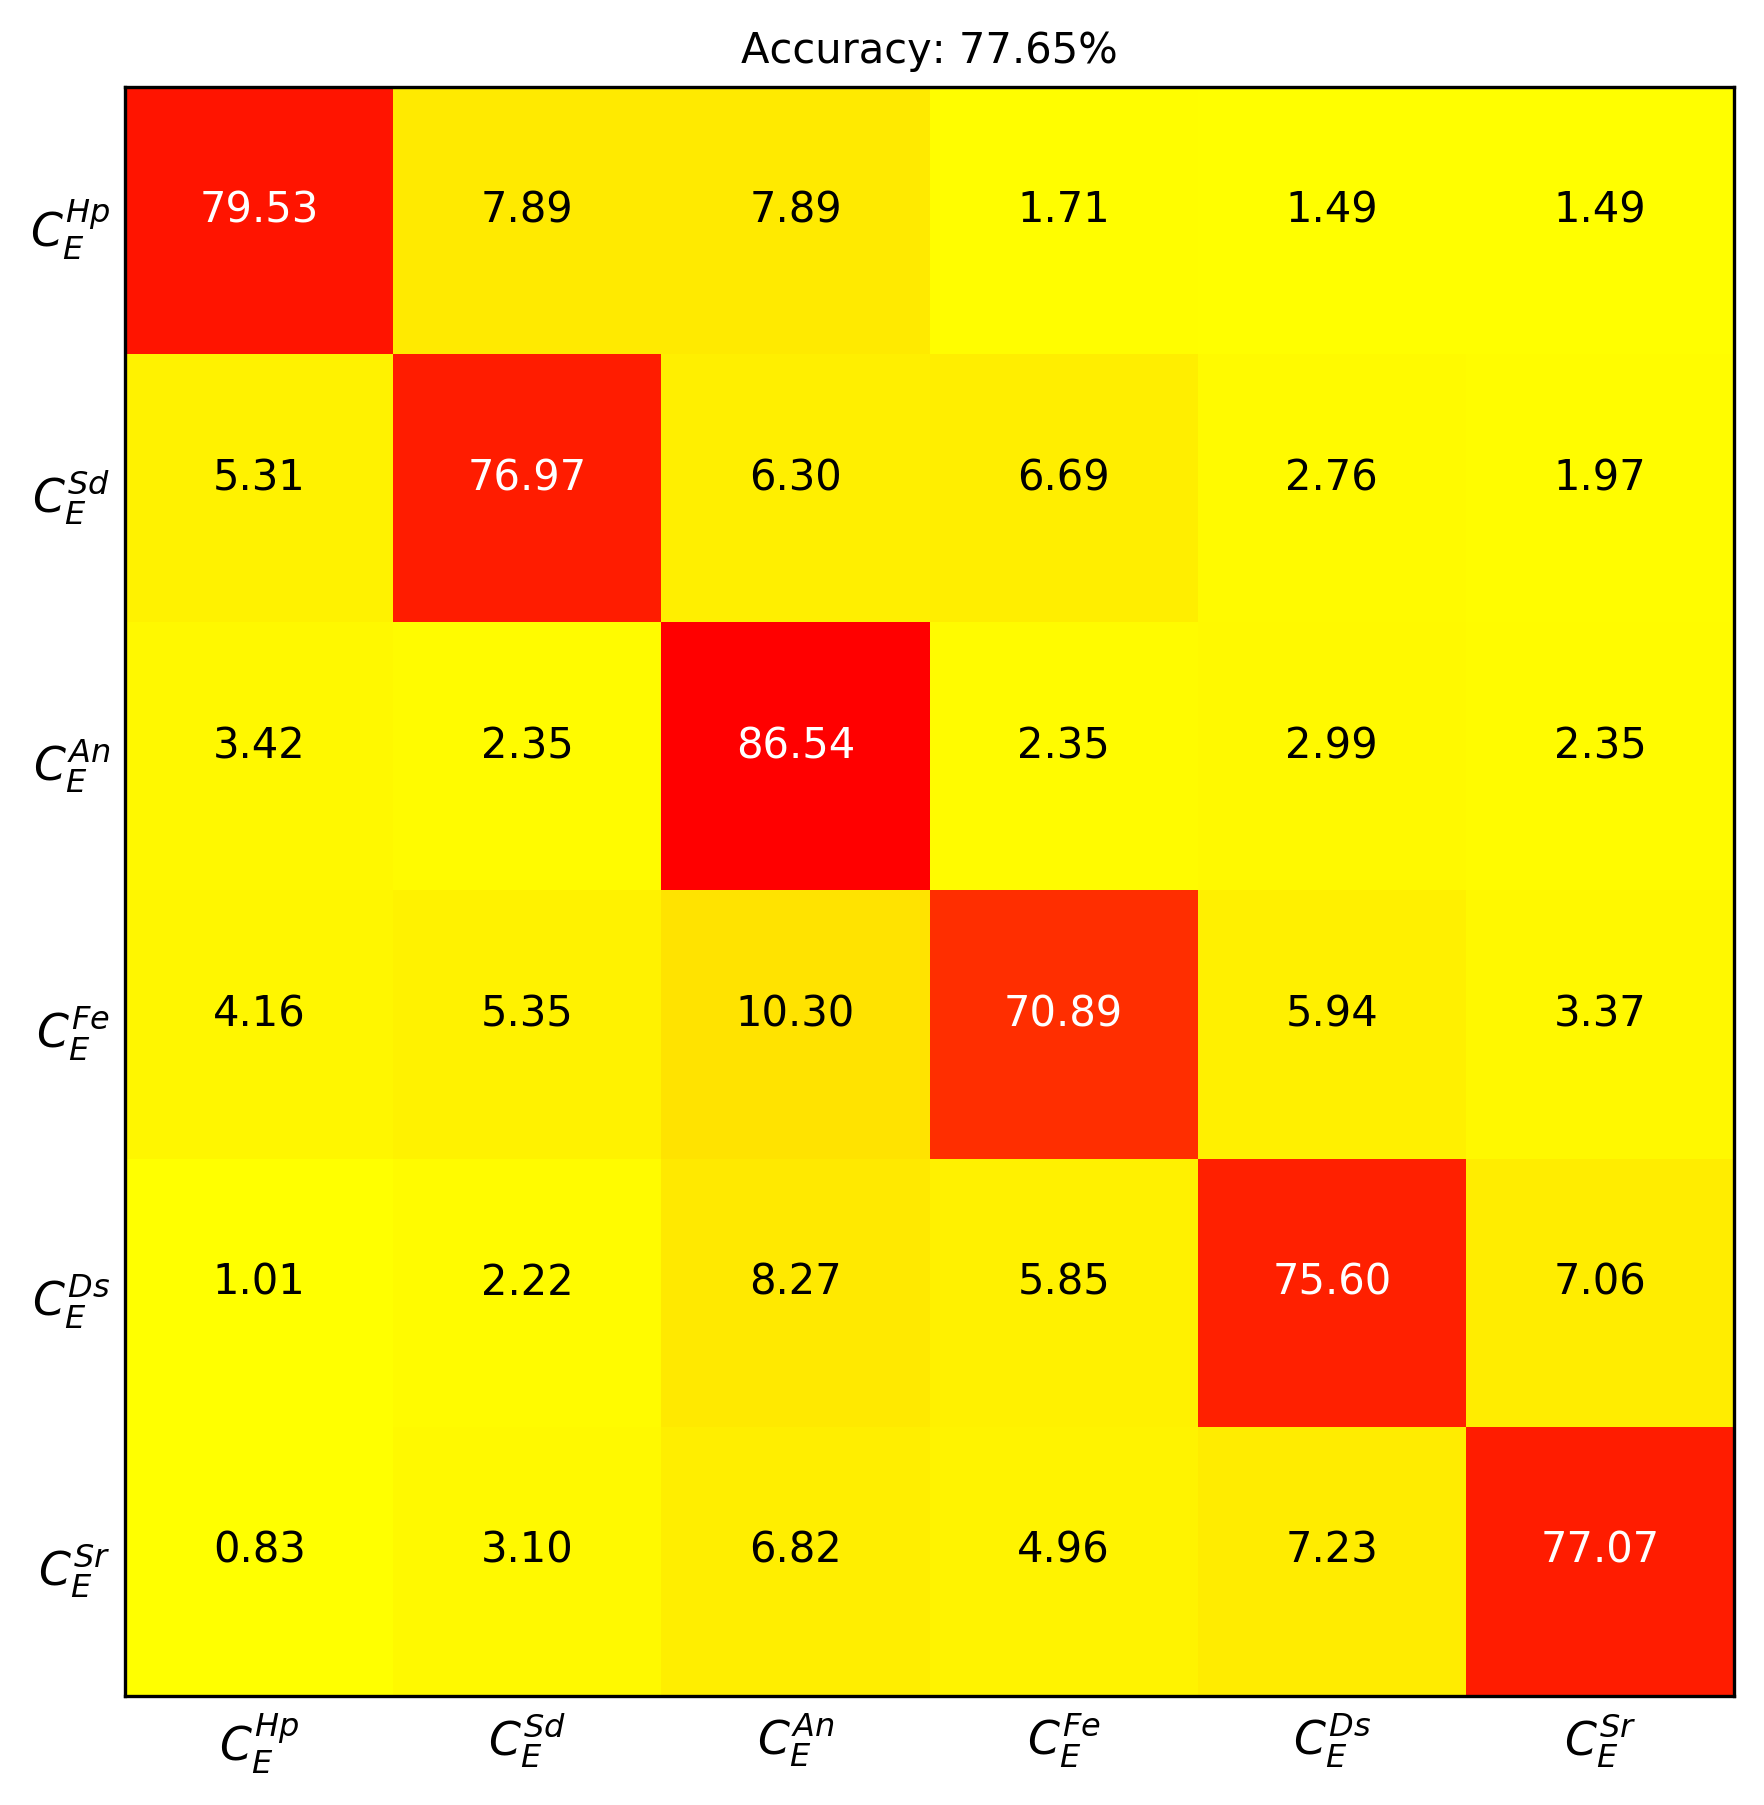

In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from matplotlib import gridspec
plt.matplotlib.rcParams.update({'font.size':6})
cmap=plt.cm.autumn_r

path = "SVM_Results\\6_Class\\All__77.65.csv"
data = pd.read_csv(path)    

cm = data.iloc[:,1:7].values
        
X = data.iloc[:,1:7].columns.values
Org = ["Hp","Sd","An","Fe","Ds","Sr"]
Y = []
for i in X:
    Y.append(Org.index(i))
Z = [x for _,x in sorted(zip(Y,X))]
classes = []
for j in Z:
    j = r'$C^{'+str(j)+'}_{E}$'
    classes.append(j)

ss = (sum(np.diag(cm))/sum(cm.sum(0)) * 100)
ss = round(ss,2)
title = "Accuracy: "+str(ss)+"%"

fig = plt.figure(figsize=(6,6), dpi=300)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm = cm * 100
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title, fontsize=10)
#plt.colorbar()
tick_marks = np.arange(len(classes))
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks(tick_marks, classes,fontsize=11)
plt.yticks(tick_marks, classes,fontsize=11)

normalize = True
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black", size=10)

plt.tight_layout()
plt.savefig('AA.png',transparent=True, bbox_inches='tight', pad_inches=0.05)
plt.show()


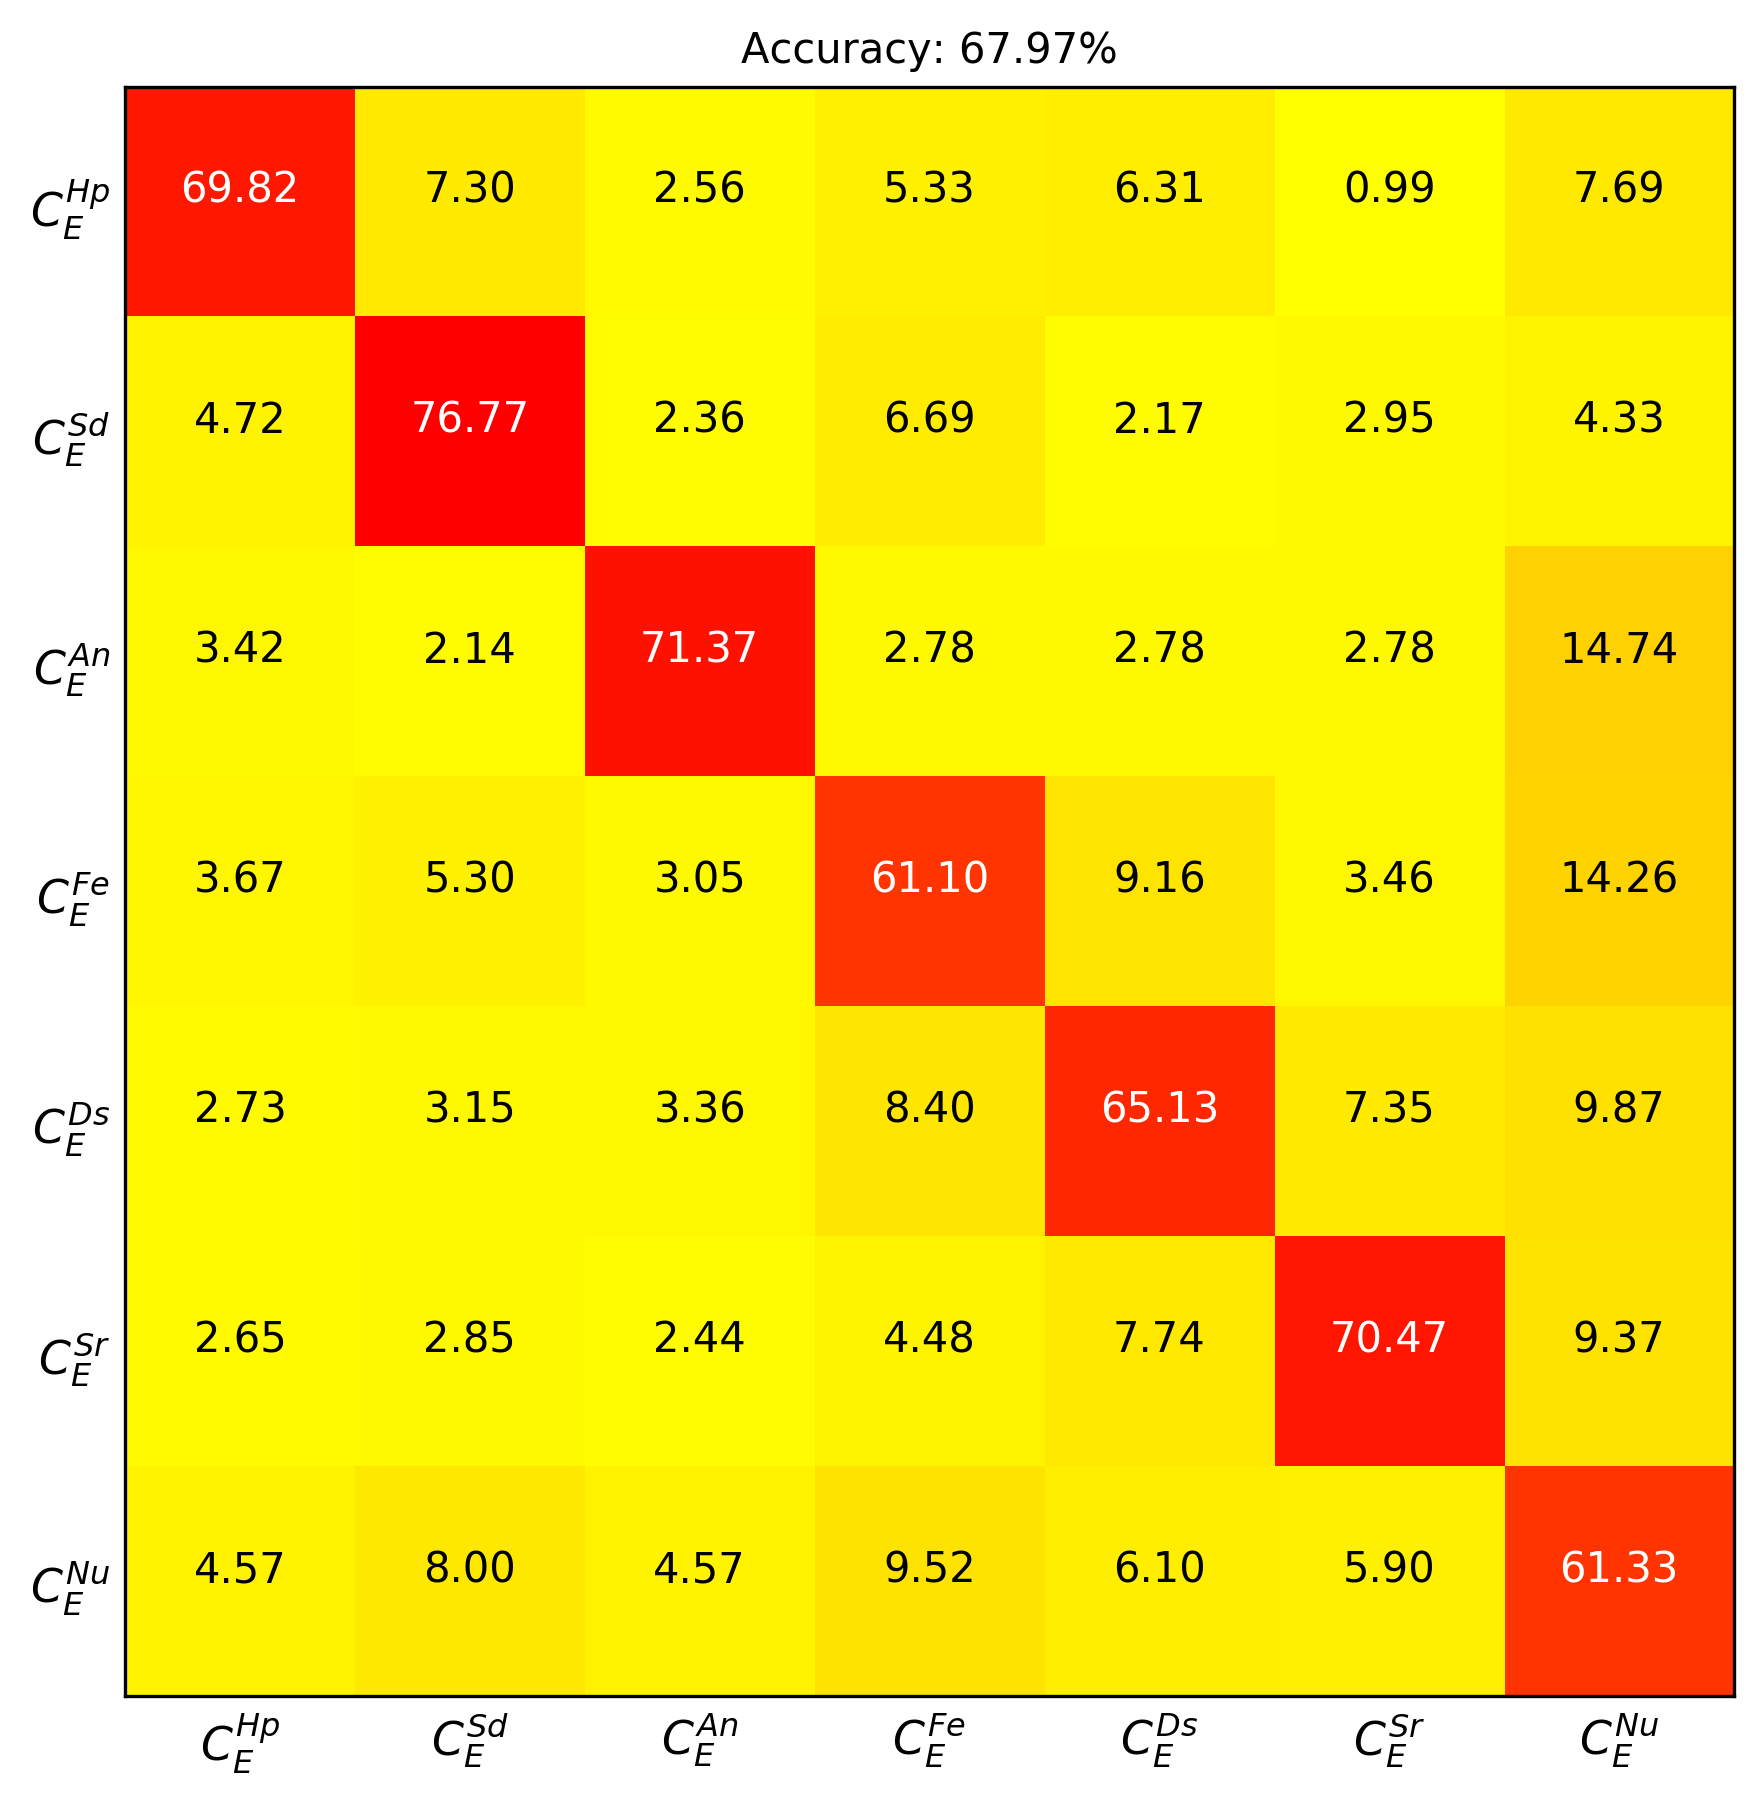

In [8]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from matplotlib import gridspec
plt.matplotlib.rcParams.update({'font.size':6})
cmap=plt.cm.autumn_r

path = "SVM_Results\\6_Class\\All_80.32.csv"
data = pd.read_csv(path)    

cm = data.iloc[:,1:8].values
        
X = data.iloc[:,1:8].columns.values
Org = ["Hp","Sd","An","Fe","Ds","Sr","Nu"]
Y = []
for i in X:
    Y.append(Org.index(i))
Z = [x for _,x in sorted(zip(Y,X))]
classes = []
for j in Z:
    j = r'$C^{'+str(j)+'}_{E}$'
    classes.append(j)

ss = (sum(np.diag(cm))/sum(cm.sum(0)) * 100)
ss = round(ss,2)
title = "Accuracy: "+str(ss)+"%"

fig = plt.figure(figsize=(6,6), dpi=300)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm = cm * 100
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title, fontsize=10)
#plt.colorbar()
tick_marks = np.arange(len(classes))
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks(tick_marks, classes,fontsize=11)
plt.yticks(tick_marks, classes,fontsize=11)

normalize = True
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black", size=10)

plt.tight_layout()
plt.savefig('BB.png',transparent=True, bbox_inches='tight', pad_inches=0.05)
plt.show()
